In [2]:
# Import all modules
import time
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras_sequential_ascii import sequential_model_to_ascii_printout
from keras import backend as K
from tensorflow.keras.losses import sparse_categorical_crossentropy
if K.common.image_dim_ordering()=='tensorflow':
    K.set_image_dim_ordering("th")
from tensorflow.keras.optimizers import Adam
# Import Tensorflow with multiprocessing
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import multiprocessing as mp

# Loading the CIFAR-10 datasets
from keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
(x_train1, y_train1), (x_test1, y_test1) = cifar10.load_data()

In [4]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

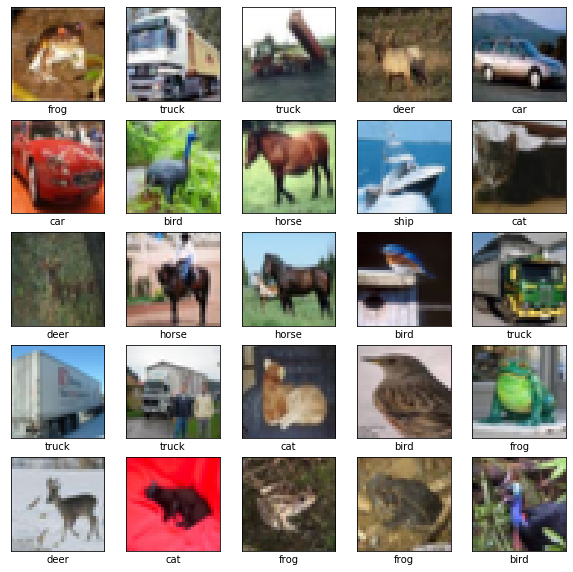

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(classes[y_train[i][0]])
plt.show()

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 64s 1ms/sample - loss: 1.8946 - acc: 0.3695 - val_loss: 1.4576 - val_acc: 0.4708
Epoch 2/10
50000/50000 [==============================] - 63s 1ms/sample - loss: 1.3670 - acc: 0.5077 - val_loss: 1.3328 - val_acc: 0.5320
Epoch 3/10
50000/50000 [==============================] - 62s 1ms/sample - loss: 1.2174 - acc: 0.5696 - val_loss: 1.1804 - val_acc: 0.5830
Epoch 4/10
50000/50000 [==============================] - 64s 1ms/sample - loss: 1.1043 - acc: 0.6117 - val_loss: 1.1942 - val_acc: 0.5861
Epoch 5/10
50000/50000 [==============================] - 62s 1ms/sample - loss: 1.0182 - acc: 0.6449 - val_loss: 1.0758 - val_acc: 0.6282
Epoch 6/10
50000/50000 [==============================] - 64s 1ms/sample - loss: 0.9443 - acc: 0.6711 - val_loss: 1.1090 - val_acc: 0.6185
Epoch 7/10
50000/50000 [==============================] - 60s 1ms/sample - loss: 0.8816 - acc: 0.6929 - val_loss: 1.

10000/10000 - 3s - loss: 1.0794 - acc: 0.6581


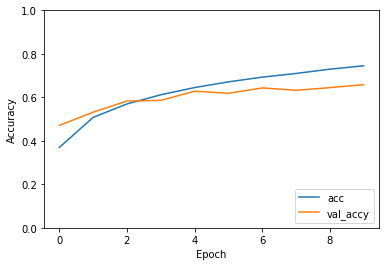

In [10]:
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label = 'val_accy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)